**Import necessary libraries**

In [1]:


import os
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
# Path to the dataset root
dataset_path = '/Users/dr.ake/Documents/GitHub/Deepfake-AI-SUTD/processed_dataset_frame'

# Define the image transformations
im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

transforms = transforms.Compose([
    transforms.Resize((im_size, im_size)),  # Resize all images to a fixed size
    transforms.ToTensor(),                  # Convert images to PyTorch tensors
    transforms.Normalize(mean, std)         # Normalize the tensor images
])

# Loading the dataset using ImageFolder
dataset = ImageFolder(dataset_path, transform=transforms)

# Splitting the dataset into train and validation subsets
train_size = int(0.8 * len(dataset))
valid_size = len(dataset) - train_size
train_dataset, valid_dataset = random_split(dataset, [train_size, valid_size])

# Creating data loaders for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)
valid_loader = DataLoader(valid_dataset, batch_size=4, shuffle=False, num_workers=2)

# Example: Checking class names and some dataset info
print("Classes:", dataset.classes)
print("Number of train samples:", len(train_dataset))
print("Number of validation samples:", len(valid_dataset))


In [2]:
# Use GPU if available, else use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


**Data Loading and Preprocessing**

In [3]:
# Get transformations
original_transform = get_original_transform()
augmented_transform = get_augmented_transform()

In [4]:
# Load the dataset from the directory
raw_dataset = datasets.ImageFolder(root='../processed_dataset_frame/processed_dataset_frame', transform=None)

# Access a raw image and its label directly
raw_img, label = raw_dataset[0]

# Now apply the transformations to the raw PIL image for demonstration
img_original_tensor = original_transform(raw_img)
img_augmented_tensor = augmented_transform(raw_img)

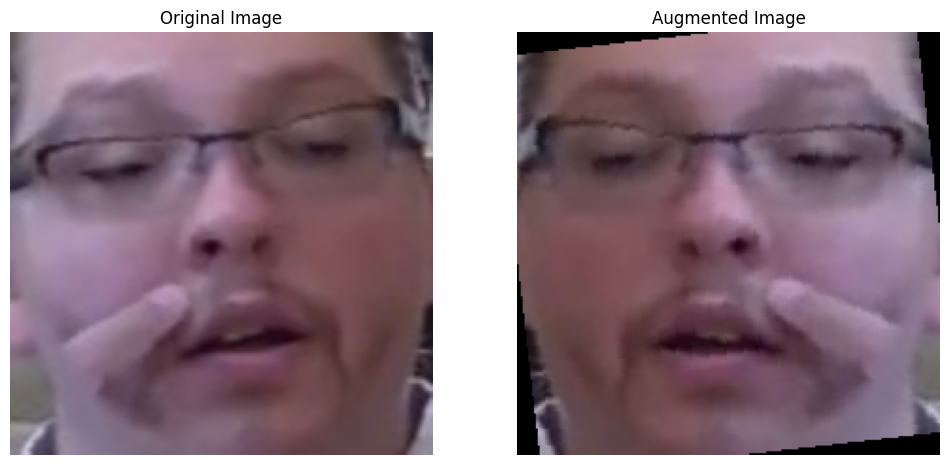

In [5]:
# Access the raw image and its label from dataset
img, label = raw_dataset[0]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Displaying the original image and the augmented image
show_image(img_original_tensor, title='Original Image', ax=axs[0])
show_image(img_augmented_tensor, title='Augmented Image', ax=axs[1])

plt.show()

In [6]:
# Create the dataloders
root_directory = '../processed_dataset_frame/processed_dataset_frame'
test_directory = '../processed_dataset_frame/processed_dataset_frame_test'
batch_size = 16
train_loader, validation_loader, test_loader = setup_data_loaders(root_directory, test_directory, batch_size)

**Define the CNN + LSTM Model**

**Initialize CNN + LSTM Model**

In [7]:
# Configuration
dropout_rate = 0.5
fc_units = 128  
lstm_units = 256
num_layers = 2

# Create the model
model = CNN_LSTM_for_DeepFake(dropout_rate=dropout_rate, fc_units=fc_units, lstm_units=lstm_units, num_layers=num_layers)
model.to(device)

CNN_LSTM_for_DeepFake(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (lstm): LSTM(3584, 256, num_layers=2, batch_first=True)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (dropout3): Dropout(p=0.5, inplace=False)
)

**Train and evaluate the model (Single trial)**

In [8]:
train_accuracies, test_accuracies, validation_accuracies, train_losses, test_losses, validation_losses = train_and_evaluate(model, train_loader, validation_loader, test_loader, epochs=10, lr=1e-4)

Epoch 1, Train Loss: 0.6525, Validation Loss: 0.6248, Test Loss: 0.6129, Train Accuracy: 60.12%, Validation Accuracy: 65.06%, Test Accuracy: 64.87%
--------------------------------------------------------------
Epoch 2, Train Loss: 0.5681, Validation Loss: 0.5181, Test Loss: 0.5333, Train Accuracy: 70.72%, Validation Accuracy: 74.42%, Test Accuracy: 72.91%
--------------------------------------------------------------
Epoch 3, Train Loss: 0.4873, Validation Loss: 0.4474, Test Loss: 0.4570, Train Accuracy: 76.21%, Validation Accuracy: 78.76%, Test Accuracy: 77.30%
--------------------------------------------------------------
Epoch 4, Train Loss: 0.4156, Validation Loss: 0.3676, Test Loss: 0.3455, Train Accuracy: 80.64%, Validation Accuracy: 82.67%, Test Accuracy: 83.73%
--------------------------------------------------------------
Epoch 5, Train Loss: 0.3794, Validation Loss: 0.3878, Test Loss: 0.4053, Train Accuracy: 82.38%, Validation Accuracy: 82.46%, Test Accuracy: 81.42%
--------

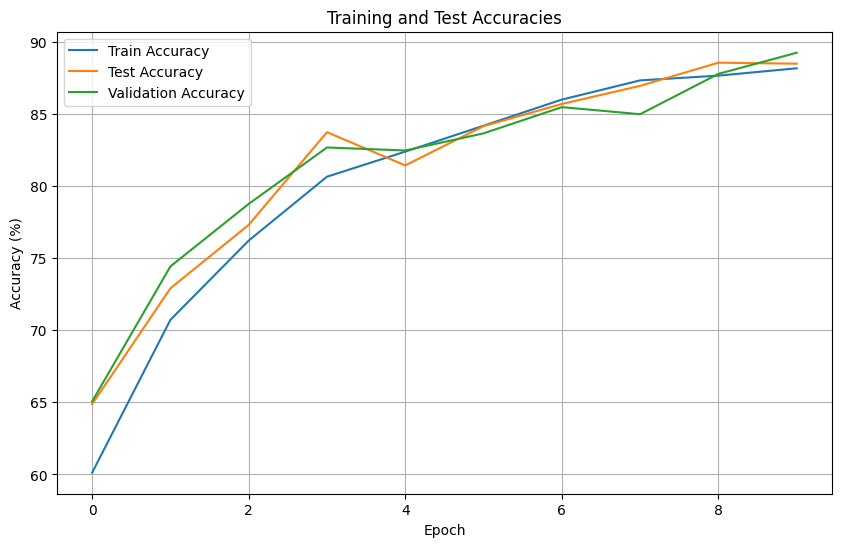

In [9]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.plot(validation_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracies')
plt.legend()
plt.grid(True)
plt.show()

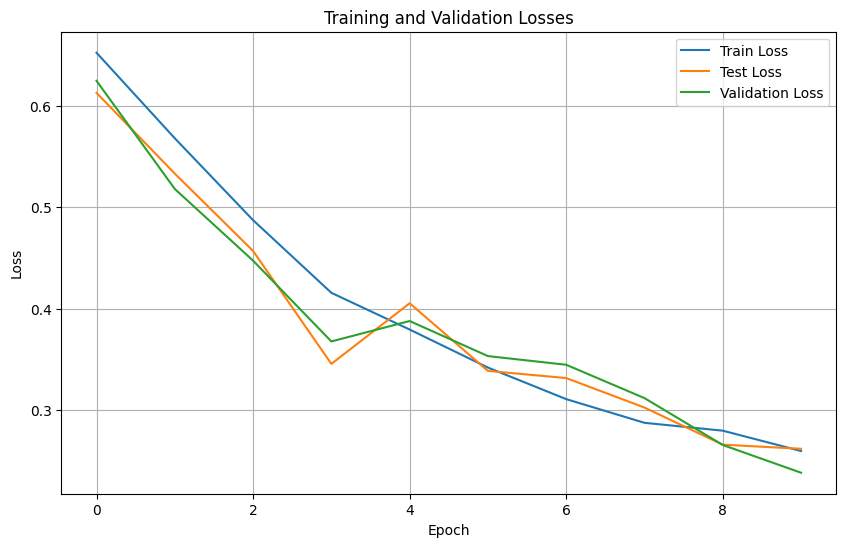

In [10]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.grid(True)
plt.show()

**Hyperparameter Search**

In [11]:
hyperparameters = {
    'learning_rate': [1e-3, 1e-4],
    'dropout_rate': [0.25, 0.5],
    'fc_units': [64, 128, 256],
    'lstm_units': [64, 128, 256],  
    'num_layers': [1, 2, 3]  
}

In [12]:
results, best_model_path = random_search_CNNLSTM(hyperparameters, num_trials=10)

Trial 1: Training with lr=0.0001, dropout=0.25, fc_units=256, lstm_units=128, num_layers=2
Epoch 1, Train Loss: 0.6652, Validation Loss: 0.6417, Test Loss: 0.6258, Train Accuracy: 58.23%, Validation Accuracy: 63.80%, Test Accuracy: 65.50%
--------------------------------------------------------------


KeyboardInterrupt: 

**Visualize the accuracy and loss obtained for all trials**

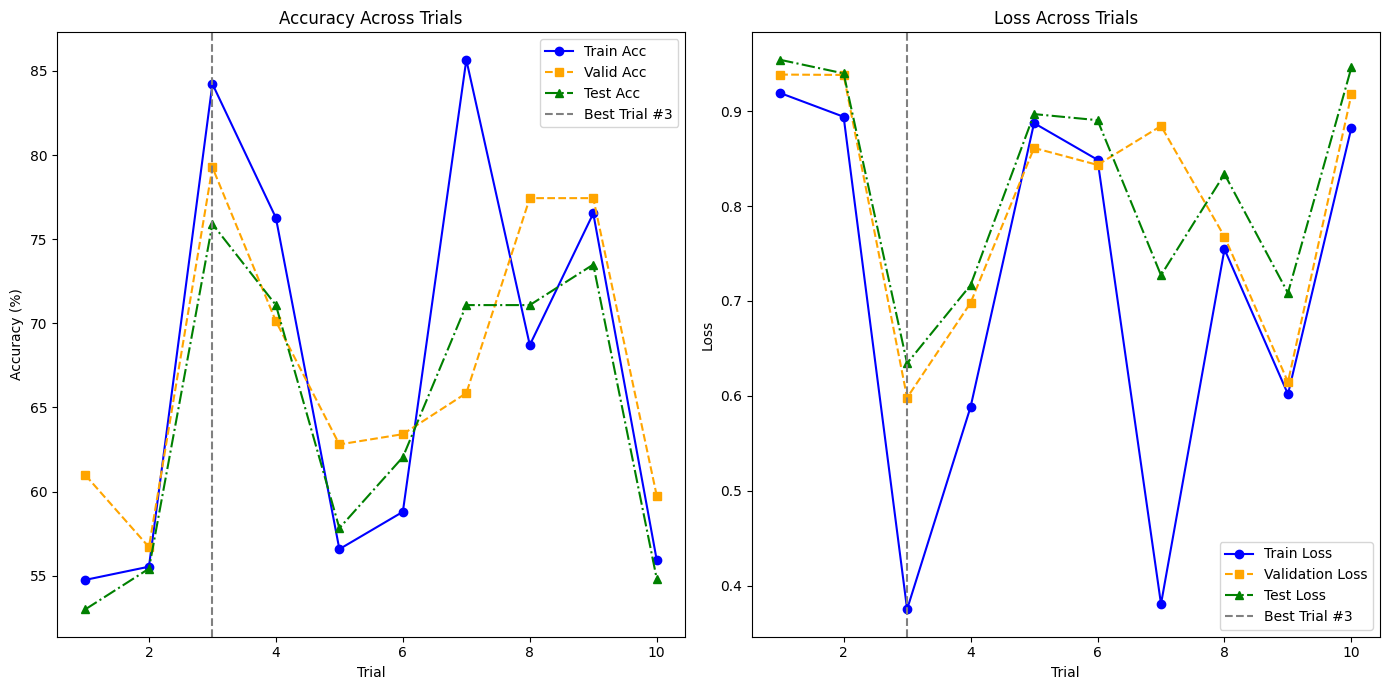

Best Trial: 3 with Validation Accuracy: 79.26829268292683%


In [47]:
train_accuracies = np.array([res['final_train_accuracy'] for res in results])
validation_accuracies = np.array([res['best_validation_accuracy'] for res in results])
test_accuracies = np.array([res['corresponding_test_accuracy'] for res in results])

train_losses = np.array([res['final_train_loss'] for res in results])
validation_losses = np.array([res['best_validation_loss'] for res in results])
test_losses = np.array([res['corresponding_test_loss'] for res in results])

trials = np.arange(1, len(results) + 1)

# Identifying the best trial based on validation accuracy
best_trial_acc = np.argmax(validation_accuracies) + 1
best_acc = validation_accuracies[best_trial_acc - 1]

# Plotting accuracies (training, validation, test)
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(trials, train_accuracies, 'o-', label='Train Acc', color='blue')
plt.plot(trials, validation_accuracies, 's--', label='Valid Acc', color='orange')
plt.plot(trials, test_accuracies, '^-.', label='Test Acc', color='green')
plt.axvline(x=best_trial_acc, color='gray', linestyle='--', label=f'Best Trial #{best_trial_acc}')
plt.title('Accuracy Across Trials')
plt.xlabel('Trial')
plt.ylabel('Accuracy (%)')
plt.legend()

# Plotting losses (training, validation, and test)
plt.subplot(1, 2, 2)
plt.plot(trials, train_losses, 'o-', label='Train Loss', color='blue')
plt.plot(trials, validation_losses, 's--', label='Validation Loss', color='orange')
plt.plot(trials, test_losses, '^-.', label='Test Loss', color='green')
plt.axvline(x=best_trial_acc, color='gray', linestyle='--', label=f'Best Trial #{best_trial_acc}')
plt.title('Loss Across Trials')
plt.xlabel('Trial')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Best Trial: {best_trial_acc} with Validation Accuracy: {best_acc}%")